# CCSN Neutrino Flavor Oscillations

Tests flavor oscillations in supernova neutrinos using the very simple calculation from [SNOwGloBES](https://github.com/SNOwGLoBES/snowglobes/blob/master/fluxes/supernova_mixing.cc).


In [1]:
%matplotlib inline

from asteria import config, source
from asteria.neutrino import Flavor

import astropy.units as u

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rc('font', size=16)

## Load Configuration

This will load the source configuration from a file.

For this to work, either the user needs to have done one of two things:
1. Run `python setup.py install` in the USSR directory.
2. Run `python setup.py develop` and set the environment variable `USSR` to point to the git source checkout.

If these were not done, the initialization will fail because the paths will not be correctly resolved.

In [2]:
conf = config.load_config('../../data/config/test.yaml')
ccsn = source.initialize(conf)

In [3]:
t12 = 0.588
s2t12 = 0.31
c2t12 = 0.69

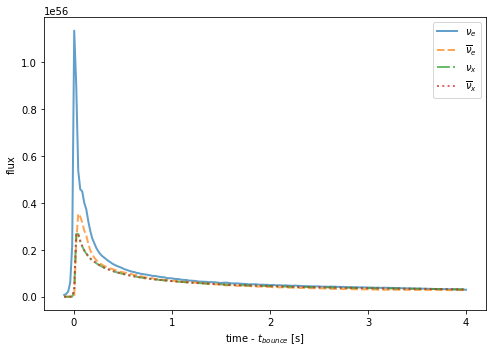

In [4]:
fig, ax = plt.subplots(1,1, figsize=(7,5))

t = np.linspace(-0.1, 4, 201) * u.s
for ls, flavor in zip(["-", "--", "-.", ":"], Flavor):
    flux = ccsn.get_flux(t, flavor)
    
    ax.plot(t, flux, ls, lw=2, label=flavor.to_tex(), alpha=0.7)
# plt.yscale('log')
# plt.ylim(3e51, 5e53)
ax.set(xlabel='time - $t_{bounce}$ [s]',
       ylabel='flux')
ax.legend()
fig.tight_layout()

## Normal Hierarchy 

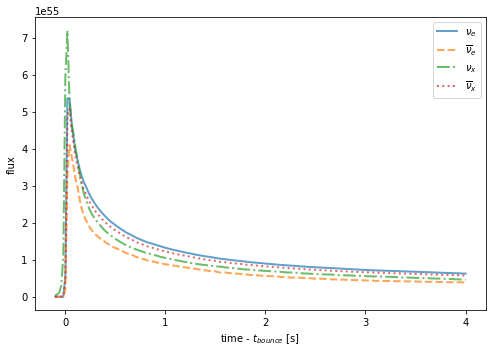

In [5]:
fig1, ax = plt.subplots(1,1, figsize=(7,5))
t = np.linspace(-0.1, 4, 201) * u.s

nu_list = []
i = 0
for flavor in Flavor:
    flux = ccsn.get_flux(t, flavor)
    nu_list.append(flux)

nu_e = [a + b for a, b in zip(nu_list[2], nu_list[3])]  
nu_x = [(a + b + c)/2 for a, b, c in zip(nu_list[0], nu_list[2], nu_list[3])]
nu_e_bar = [a*c2t12 + (b + c)*s2t12 for a, b, c in zip(nu_list[1], nu_list[2], nu_list[3])]
nu_x_bar = [((1.0-c2t12)*a + (1.0+c2t12)*(b + c))/2 for a, b, c in zip(nu_list[1], nu_list[2], nu_list[3])]
nu_new = [nu_e, nu_e_bar, nu_x, nu_x_bar]

for ls, i, flavor in zip(["-", "--", "-.", ":"], range(len(nu_new)), Flavor):
    new_flux = nu_new[i]
    ax.plot(t, new_flux, ls, lw=2, alpha=0.7, label=flavor.to_tex()), 

# plt.yscale('log')
# plt.ylim(3e51, 5e53)

ax.set(xlabel='time - $t_{bounce}$ [s]',
       ylabel='flux')
ax.legend()
fig1.tight_layout()

## Inverted Hierarchy

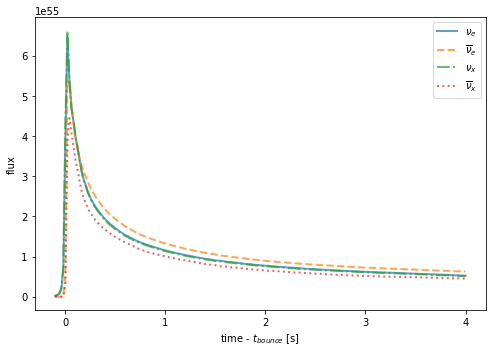

In [6]:
fig2, ax = plt.subplots(1,1, figsize=(7,5))
t = np.linspace(-0.1, 4, 201) * u.s

nu_list = []
i = 0
for flavor in Flavor:
    flux = ccsn.get_flux(t, flavor)
    nu_list.append(flux)

nu_e = [a*s2t12 + (b + c)*c2t12 for a, b, c in zip(nu_list[0], nu_list[2], nu_list[3])]   
nu_x = [((1.0-s2t12)*a + (1.0+s2t12)*(b + c))/2 for a, b, c in zip(nu_list[0], nu_list[2], nu_list[3])] 
nu_e_bar = [a + b for a, b in zip(nu_list[2], nu_list[3])] 
nu_x_bar = [(a + b + c)/2 for a, b, c in zip(nu_list[1], nu_list[2], nu_list[3])]
nu_new = [nu_e, nu_e_bar, nu_x, nu_x_bar]

for ls, i, flavor in zip(["-", "--", "-.", ":"], range(len(nu_new)), Flavor):
    new_flux = nu_new[i]
    ax.plot(t, new_flux, ls, lw=2, alpha=0.7, label=flavor.to_tex()), 

# plt.yscale('log')
# plt.ylim(3e51, 5e53)

ax.set(xlabel='time - $t_{bounce}$ [s]',
       ylabel='flux')
ax.legend()
fig2.tight_layout()

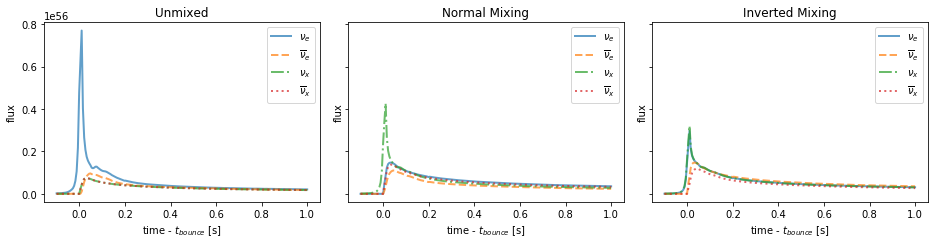

In [7]:
fig, axes = plt.subplots(1, 3, figsize=(13,3.5), sharex=True, sharey=True)

ax1, ax2, ax3 = axes
t = np.linspace(-0.1, 1, 201) * u.s

#UNMIXED

for ls, flavor in zip(["-", "--", "-.", ":"], Flavor):
    flux = ccsn.get_flux(t, flavor)
    
    ax1.plot(t, flux, ls, lw=2, label=flavor.to_tex(), alpha=0.7)
    ax1.set_title("Unmixed")
# plt.yscale('log')
# plt.ylim(3e51, 5e53)
ax1.set(xlabel='time - $t_{bounce}$ [s]',
        ylabel='flux')
ax1.legend()

#NORMAL MIXING

nu_list1 = []
i = 0
for flavor in Flavor:
    flux = ccsn.get_flux(t, flavor)
    nu_list1.append(flux)
    
'''Components of nu_list1
   ----------------------  
   nu_list1[0]: initial flux of nu_e 
   nu_list1[1]: initial flux of nu_e_bar
   nu_list1[2]: initial flux of nu_x
   nu_list1[3]: initial flux of nu_x_bar
'''

nu_e1 = [a + b for a, b in zip(nu_list1[2], nu_list1[3])]  
nu_x1 = [(a + b + c)/2 for a, b, c in zip(nu_list1[0], nu_list1[2], nu_list1[3])]
nu_e_bar1 = [a*c2t12 + (b+c)*s2t12 for a, b, c in zip(nu_list1[1], nu_list1[2], nu_list1[3])]
nu_x_bar1 = [((1.0-c2t12)*a + (1.0+c2t12)*(b+c))/2 for a, b, c in zip(nu_list1[1], nu_list1[2], nu_list1[3])]
nu_new1 = [nu_e1, nu_e_bar1, nu_x1, nu_x_bar1]

for ls, i, flavor in zip(["-", "--", "-.", ":"], range(len(nu_new1)), Flavor):
    new_flux1 = nu_new1[i]
    ax2.plot(t, new_flux1, ls, lw=2, alpha=0.7, label=flavor.to_tex())
    ax2.set_title(label="Normal Mixing")

# plt.yscale('log')
# plt.ylim(3e51, 5e53)

ax2.set(xlabel='time - $t_{bounce}$ [s]',
        ylabel='flux')

ax2.legend()

#INVERTED MIXING

nu_list2 = []
i = 0
for flavor in Flavor:
    flux = ccsn.get_flux(t, flavor)
    nu_list2.append(flux)

'''Components of nu_list2
   ----------------------  
   nu_list2[0]: initial flux of nu_e 
   nu_list2[1]: initial flux of nu_e_bar
   nu_list2[2]: initial flux of nu_x
   nu_list2[3]: initial flux of nu_x_bar
'''    
    
nu_e2 = [a*s2t12 + (b + c)*c2t12 for a, b, c in zip(nu_list2[0], nu_list2[2], nu_list2[3])]   
nu_x2 = [((1.0-s2t12)*a + (1.0+s2t12)*(b+c))/2 for a, b, c in zip(nu_list2[0], nu_list2[2], nu_list2[3])] 
nu_e_bar2 = [a + b for a, b in zip(nu_list2[2], nu_list2[3])]
nu_x_bar2 = [(a + b + c)/2 for a, b, c in zip(nu_list2[1], nu_list2[2], nu_list2[3])]
nu_new2 = [nu_e2, nu_e_bar2, nu_x2, nu_x_bar2]

for ls, i, flavor in zip(["-", "--", "-.", ":"], range(len(nu_new2)), Flavor):
    new_flux2 = nu_new2[i]
    ax3.plot(t, new_flux2, ls, lw=2, alpha=0.7, label=flavor.to_tex())
    ax3.set_title(label="Inverted Mixing")

# plt.yscale('log')
# plt.ylim(3e51, 5e53)

ax3.set(xlabel='time - $t_{bounce}$ [s]',
        ylabel='flux')
ax3.legend()


fig.tight_layout();

### Inverted Mixing with Gaussian error

In [8]:
s2t12_er = c2t12_er = 0.013 #symmetrical error assumed

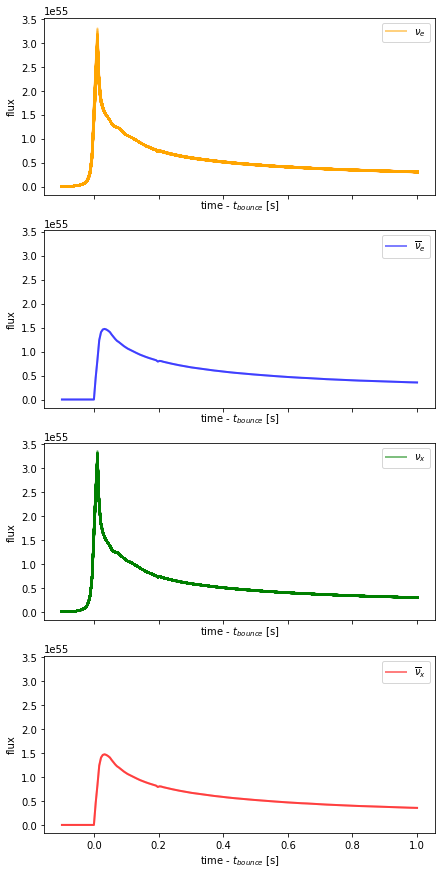

In [9]:
fig1, axes = plt.subplots(4, 1, figsize=(7,15), sharex = True, sharey = True)
t = np.linspace(-0.1, 1, 201) * u.s
ax1, ax2, ax3, ax4 = axes

s2t12_val = np.random.normal(loc = s2t12, scale = s2t12_er, size = 1000)
c2t12_val = 1 - s2t12_val
nu_e2_er = [a*s2t12_val + (b + c)*c2t12_val for a, b, c in zip(nu_list2[0], nu_list2[2], nu_list2[3])]
nu_x2_er = [((1.0-s2t12_val)*a + (1.0+s2t12_val)*(b+c))/2 for a, b, c in zip(nu_list2[0], nu_list2[2], nu_list2[3])] 
nu_e_bar2_er = [a + b for a, b in zip(nu_list2[2], nu_list2[3])]
nu_x_bar2_er = [(a + b + c)/2 for a, b, c in zip(nu_list2[1], nu_list2[2], nu_list2[3])]
nu_new = [nu_e2_er, nu_x2_er, nu_e_bar2_er, nu_x_bar2_er]
    
ax1.plot(t, nu_e2_er, ls = '-', lw=2, alpha=0.5, color = "orange")
ax2.plot(t, nu_e_bar2_er, ls = '-', lw=2, alpha=0.5, color = "blue")
ax3.plot(t, nu_x2_er, ls = '-', lw=2, alpha=0.5, color = "green")
ax4.plot(t, nu_e_bar2_er, ls = '-', lw=2, alpha=0.5, color = "red")
    
ax1.plot(t, nu_e2, ls = '-', lw=2, alpha=0.5, label = r"$\nu _{e}$", color = "orange")
ax2.plot(t, nu_e_bar2, ls = '-', lw=2, alpha=0.5, label = r"$\overline{\nu}_{e}$", color = "blue")
ax3.plot(t, nu_x2, ls = '-', lw=2, alpha=0.5, label = r"$\nu _{x}$", color = "green")
ax4.plot(t, nu_e_bar2, ls = '-', lw=2, alpha=0.5, label = r"$\overline{\nu}_{x}$", color = "red")

ax1.set(xlabel='time - $t_{bounce}$ [s]',
       ylabel='flux')
ax1.legend()

ax2.set(xlabel='time - $t_{bounce}$ [s]',
       ylabel='flux')
ax2.legend()

ax3.set(xlabel='time - $t_{bounce}$ [s]',
       ylabel='flux')
ax3.legend()

ax4.set(xlabel='time - $t_{bounce}$ [s]',
       ylabel='flux')
ax4.legend()

fig.tight_layout()
    